Vikor 方法是一种基于多个标准，选择最好的（折中的）策略的方法。非常类似于 **TOPSIS 综合评价方法**。

# 多标准决策（MCDM）问题

## 问题描述
现有 n 个可行方案，每个方案均有 m 个指标，用 $ f_{ij} $ 表示第 i 个方案的第 j 个指标。现在要求出多准则意义上的最佳（折衷）解决方案。

例如，现在有 $ A_{1} $ - $ A_{4} $ 四架飞机（即 n=4），每架飞机有 m=6 个指标，如下表所示。需要选出多准则意义上的最佳飞机。

## 数据表格

| 飞机编号 | 最大速度 | 飞行半径 | 最大负载 | 费用      | 可靠性 | 灵敏度 |
|----------|----------|----------|----------|-----------|--------|--------|
| $ A_{1} $ | 2.0      | 1500     | 20000    | 5500000   | 0.5    | 1      |
| $ A_{2} $ | 2.5      | 2700     | 18000    | 6500000   | 0.3    | 0.5    |
| $ A_{3} $ | 1.8      | 2000     | 21000    | 4500000   | 0.7    | 0.7    |
| $ A_{4} $ | 2.2      | 1800     | 20000    | 5000000   | 0.5    | 0.5    |

**极大型指标**指的是值越大越好的指标，如效率、产能、可靠性等，又称“效益型指标”。相对地，**极小型指标**指的是值越小越好的指标，如能耗、费用等，又称“成本性指标”。还有一类**中间型指标**，其值太大太小都不好，位于一个区间才合适，例如人的 BMI。

In [1]:
import pandas as pd

data = [
    # [最大速度, 飞行半径, 最大负载, 费用, 可靠性, 灵敏度]
    [2.0, 1500, 20000, 5500000, 0.5, 1.0],   # A1
    [2.5, 2700, 18000, 6500000, 0.3, 0.5],   # A2
    [1.8, 2000, 21000, 4500000, 0.7, 0.7],   # A3
    [2.2, 1800, 20000, 5000000, 0.5, 0.5],   # A4
]

aircraft_names = ["A1", "A2", "A3", "A4"]
indicator_names = ["最大速度", "飞行半径", "最大负载", "费用", "可靠性", "灵敏度"]

data = pd.DataFrame(data=data, columns=indicator_names, index=aircraft_names)

data

,最大速度,飞行半径,最大负载,费用,可靠性,灵敏度
A1,2.0,1500,20000,5500000,0.5,1.0
A2,2.5,2700,18000,6500000,0.3,0.5
A3,1.8,2000,21000,4500000,0.7,0.7
A4,2.2,1800,20000,5000000,0.5,0.5


In [2]:
# 把每个指标都处理成极大型指标
# 执行线性变换并归一化

import numpy as np

cost_class = ['费用']  # 极小型指标（成本型指标）

# 创建归一化后的数据副本
normalized_data = data.copy()

print("原始数据:")
print(data)
print("\n" + "="*50)

# 对每个指标进行处理
for col in data.columns:
    col_max = data[col].max()
    
    if col in cost_class:
        # 对于极小型指标（如费用），使用公式: b_ij = 1 - a_ij / a_j^max
        normalized_data[col] = 1 - data[col] / col_max
        print(f"\n极小型指标 '{col}' 处理:")
        print(f"  最大值: {col_max}")
        print(f"  转换公式: b_ij = 1 - a_ij / {col_max}")
    else:
        # 对于极大型指标，使用公式: b_ij = a_ij / a_j^max
        normalized_data[col] = data[col] / col_max
        print(f"\n极大型指标 '{col}' 处理:")
        print(f"  最大值: {col_max}")
        print(f"  转换公式: b_ij = a_ij / {col_max}")

print("\n" + "="*50)
print("归一化后的数据 (所有指标均为极大型):")
print(normalized_data.round(4))

# 验证归一化结果
print("\n" + "="*30)
print("归一化结果验证:")
for col in normalized_data.columns:
    print(f"{col}: 范围 [{normalized_data[col].min():.4f}, {normalized_data[col].max():.4f}]")

原始数据:
    最大速度  飞行半径   最大负载       费用  可靠性  灵敏度
A1   2.0  1500  20000  5500000  0.5  1.0
A2   2.5  2700  18000  6500000  0.3  0.5
A3   1.8  2000  21000  4500000  0.7  0.7
A4   2.2  1800  20000  5000000  0.5  0.5


极大型指标 '最大速度' 处理:
  最大值: 2.5
  转换公式: b_ij = a_ij / 2.5

极大型指标 '飞行半径' 处理:
  最大值: 2700
  转换公式: b_ij = a_ij / 2700

极大型指标 '最大负载' 处理:
  最大值: 21000
  转换公式: b_ij = a_ij / 21000

极小型指标 '费用' 处理:
  最大值: 6500000
  转换公式: b_ij = 1 - a_ij / 6500000

极大型指标 '可靠性' 处理:
  最大值: 0.7
  转换公式: b_ij = a_ij / 0.7

极大型指标 '灵敏度' 处理:
  最大值: 1.0
  转换公式: b_ij = a_ij / 1.0

归一化后的数据 (所有指标均为极大型):
    最大速度    飞行半径    最大负载      费用     可靠性  灵敏度
A1  0.80  0.5556  0.9524  0.1538  0.7143  1.0
A2  1.00  1.0000  0.8571  0.0000  0.4286  0.5
A3  0.72  0.7407  1.0000  0.3077  1.0000  0.7
A4  0.88  0.6667  0.9524  0.2308  0.7143  0.5

归一化结果验证:
最大速度: 范围 [0.7200, 1.0000]
飞行半径: 范围 [0.5556, 1.0000]
最大负载: 范围 [0.8571, 1.0000]
费用: 范围 [0.0000, 0.3077]
可靠性: 范围 [0.4286, 1.0000]
灵敏度: 范围 [0.5000, 1.0000]


In [3]:
# VIKOR 方法核心计算
print("VIKOR 方法计算过程")
print("="*60)

# 步骤1: 确定最佳值f*和最差值f-
f_star = normalized_data.max()  # 各指标的最佳值（最大值）
f_minus = normalized_data.min()  # 各指标的最差值（最小值）

print("步骤1: 确定各指标的最佳值(f*)和最差值(f-):")
print("最佳值 f*:")
for i, col in enumerate(normalized_data.columns):
    print(f"  {col}: {f_star.iloc[i]:.4f}")

print("\n最差值 f-:")
for i, col in enumerate(normalized_data.columns):
    print(f"  {col}: {f_minus.iloc[i]:.4f}")

# 步骤2: 设置权重（这里假设等权重）
# 要作为参数传入
weights = np.array([1/6] * 6)  # 等权重
print(f"\n步骤2: 设置权重 (等权重): {weights}")

# 步骤3: 计算S值和R值
S_values = []  # 群体效用值
R_values = []  # 个体遗憾值

print("\n步骤3: 计算S值(群体效用)和R值(个体遗憾):")
print("-"*50)

for i, aircraft in enumerate(normalized_data.index):
    # 计算每个指标的差值
    diff = f_star - normalized_data.loc[aircraft]
    range_val = f_star - f_minus
    
    # 避免除零错误
    normalized_diff = np.where(range_val > 0, diff / range_val, 0)
    
    # S值：群体效用（加权平均）
    S_i = np.sum(weights * normalized_diff)
    S_values.append(S_i)
    
    # R值：个体遗憾（最大加权差值）
    R_i = np.max(weights * normalized_diff)
    R_values.append(R_i)
    
    print(f"{aircraft}:")
    print(f"  S值 (群体效用): {S_i:.4f}")
    print(f"  R值 (个体遗憾): {R_i:.4f}")

S_values = np.array(S_values)
R_values = np.array(R_values)

# 找到S和R的最值
S_star = S_values.min()
S_minus = S_values.max()
R_star = R_values.min()
R_minus = R_values.max()

print(f"\nS值范围: [{S_star:.4f}, {S_minus:.4f}]")
print(f"R值范围: [{R_star:.4f}, {R_minus:.4f}]")

VIKOR 方法计算过程
步骤1: 确定各指标的最佳值(f*)和最差值(f-):
最佳值 f*:
  最大速度: 1.0000
  飞行半径: 1.0000
  最大负载: 1.0000
  费用: 0.3077
  可靠性: 1.0000
  灵敏度: 1.0000

最差值 f-:
  最大速度: 0.7200
  飞行半径: 0.5556
  最大负载: 0.8571
  费用: 0.0000
  可靠性: 0.4286
  灵敏度: 0.5000

步骤2: 设置权重 (等权重): [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]

步骤3: 计算S值(群体效用)和R值(个体遗憾):
--------------------------------------------------
A1:
  S值 (群体效用): 0.5079
  R值 (个体遗憾): 0.1667
A2:
  S值 (群体效用): 0.6667
  R值 (个体遗憾): 0.1667
A3:
  S值 (群体效用): 0.3639
  R值 (个体遗憾): 0.1667
A4:
  S值 (群体效用): 0.5437
  R值 (个体遗憾): 0.1667

S值范围: [0.3639, 0.6667]
R值范围: [0.1667, 0.1667]


In [4]:
# 步骤4: 计算Q值（VIKOR指数）
print("\n步骤4: 计算Q值 (VIKOR指数):")
print("-"*50)

# 决策机制系数v（通常取0.5，表示群体效用和个体遗憾同等重要）
v = 0.5

Q_values = []
for i, aircraft in enumerate(normalized_data.index):
    if S_minus != S_star and R_minus != R_star:
        Q_i = v * (S_values[i] - S_star) / (S_minus - S_star) + \
              (1 - v) * (R_values[i] - R_star) / (R_minus - R_star)
    else:
        # 如果分母为0，说明所有方案在某个维度上相同
        Q_i = v * (S_values[i] - S_star) if S_minus != S_star else \
              (1 - v) * (R_values[i] - R_star) if R_minus != R_star else 0
    
    Q_values.append(Q_i)
    print(f"{aircraft}: Q值 = {Q_i:.4f}")

Q_values = np.array(Q_values)

# 步骤5: 创建结果汇总表
print(f"\n步骤5: VIKOR方法结果汇总 (v = {v}):")
print("="*80)

results_df = pd.DataFrame({
    '方案': normalized_data.index,
    'S值(群体效用)': S_values,
    'R值(个体遗憾)': R_values,
    'Q值(VIKOR指数)': Q_values
})

# 按Q值排序（Q值越小越好）
results_df = results_df.sort_values('Q值(VIKOR指数)')
results_df['排名'] = range(1, len(results_df) + 1)

print(results_df.round(4))



步骤4: 计算Q值 (VIKOR指数):
--------------------------------------------------
A1: Q值 = 0.0720
A2: Q值 = 0.1514
A3: Q值 = 0.0000
A4: Q值 = 0.0899

步骤5: VIKOR方法结果汇总 (v = 0.5):
   方案  S值(群体效用)  R值(个体遗憾)  Q值(VIKOR指数)  排名
2  A3    0.3639    0.1667       0.0000   1
0  A1    0.5079    0.1667       0.0720   2
3  A4    0.5437    0.1667       0.0899   3
1  A2    0.6667    0.1667       0.1514   4


In [7]:

metrics_data = []
for _, row in results_df.iterrows():
    metrics_data.extend([
        {'方案': row['方案'], '指标': 'S值(群体效用)', '数值': row['S值(群体效用)']},
        {'方案': row['方案'], '指标': 'R值(个体遗憾)', '数值': row['R值(个体遗憾)']},
        {'方案': row['方案'], '指标': 'Q值(VIKOR指数)', '数值': row['Q值(VIKOR指数)']}
    ])
    
print(metrics_data)   

metrics_df = pd.DataFrame(metrics_data)

metrics_df

[{'方案': 'A3', '指标': 'S值(群体效用)', '数值': 0.36388888888888893}, {'方案': 'A3', '指标': 'R值(个体遗憾)', '数值': 0.16666666666666666}, {'方案': 'A3', '指标': 'Q值(VIKOR指数)', '数值': 0.0}, {'方案': 'A1', '指标': 'S值(群体效用)', '数值': 0.5079365079365079}, {'方案': 'A1', '指标': 'R值(个体遗憾)', '数值': 0.16666666666666666}, {'方案': 'A1', '指标': 'Q值(VIKOR指数)', '数值': 0.07202380952380949}, {'方案': 'A4', '指标': 'S值(群体效用)', '数值': 0.5436507936507936}, {'方案': 'A4', '指标': 'R值(个体遗憾)', '数值': 0.16666666666666666}, {'方案': 'A4', '指标': 'Q值(VIKOR指数)', '数值': 0.08988095238095234}, {'方案': 'A2', '指标': 'S值(群体效用)', '数值': 0.6666666666666666}, {'方案': 'A2', '指标': 'R值(个体遗憾)', '数值': 0.16666666666666666}, {'方案': 'A2', '指标': 'Q值(VIKOR指数)', '数值': 0.15138888888888885}]


,方案,指标,数值
0,A3,S值(群体效用),0.363889
1,A3,R值(个体遗憾),0.166667
2,A3,Q值(VIKOR指数),0.000000
3,A1,S值(群体效用),0.507937
4,A1,R值(个体遗憾),0.166667
5,A1,Q值(VIKOR指数),0.072024
6,A4,S值(群体效用),0.543651
7,A4,R值(个体遗憾),0.166667
8,A4,Q值(VIKOR指数),0.089881
9,A2,S值(群体效用),0.666667


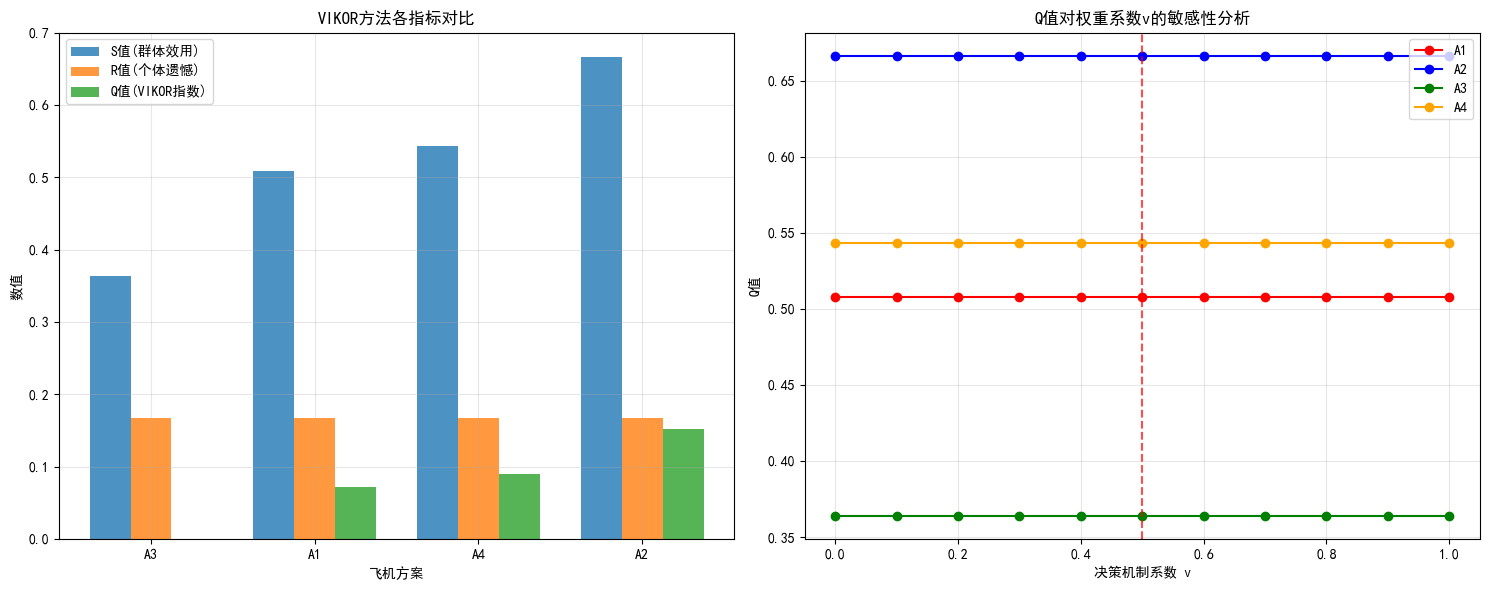


敏感性分析说明:
- v=0: 完全重视个体遗憾（R值）
- v=1: 完全重视群体效用（S值）
- v=0.5: 平衡考虑两者（推荐值）


In [ ]:
# 结果分析和可视化
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示

# 可视化结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# 1. S值、R值、Q值对比
x = np.arange(len(results_df))
width = 0.25

ax1.bar(x - width, results_df['S值(群体效用)'], width, label='S值(群体效用)', alpha=0.8)
ax1.bar(x, results_df['R值(个体遗憾)'], width, label='R值(个体遗憾)', alpha=0.8)
ax1.bar(x + width, results_df['Q值(VIKOR指数)'], width, label='Q值(VIKOR指数)', alpha=0.8)

ax1.set_xlabel('飞机方案')
ax1.set_ylabel('数值')
ax1.set_title('VIKOR方法各指标对比')
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['方案'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 权重敏感性分析
v_range = np.linspace(0, 1, 11)
Q_sensitivity = np.zeros((len(normalized_data), len(v_range)))

for j, v_test in enumerate(v_range):
    for i in range(len(normalized_data)):
        if S_minus != S_star and R_minus != R_star:
            Q_test = v_test * (S_values[i] - S_star) / (S_minus - S_star) + \
                     (1 - v_test) * (R_values[i] - R_star) / (R_minus - R_star)
        else:
            Q_test = S_values[i] if S_minus != S_star else R_values[i]
        Q_sensitivity[i, j] = Q_test

for i, aircraft in enumerate(normalized_data.index):
    ax2.plot(v_range, Q_sensitivity[i], 'o-', label=aircraft, color=colors[i])

ax2.set_xlabel('决策机制系数 v')
ax2.set_ylabel('Q值')
ax2.set_title('Q值对权重系数v的敏感性分析')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='当前v=0.5')

plt.tight_layout()
plt.show()

print(f"\n敏感性分析说明:")
print("- v=0: 完全重视个体遗憾（R值）")
print("- v=1: 完全重视群体效用（S值）") 
print("- v=0.5: 平衡考虑两者（推荐值）")